# Deep Learning Lectures for Music Analysis

[playlist](https://www.youtube.com/playlist?list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf)

# 2- AI, Machine Learning, and Deep Learning

**Paradigms**: 
- Supervised Learning: learn by example
- Unsupervised Learning: find patterns in unstructured data
- Reinforcement Learning: learn by rewards and punishments

**Some ML algorithms**: 
- Logistic Regression
- Linear Regression
- Random Forest
- KNN
- Support Vector Machines
- Neual Networks
    - Structured in a series of neuronal layers
    - Each neuron is a computational unit
    
**Traditional ML vs DL**<br>
ML has lots of feature engineering, (relatively) small dataset, less compoutationally intensive, ideal for 'simple' problems<br>
DL handles things more end-to-end, very large dataset (1e6-7 datapoints), very resource intensive, ideal for 'complex' problems<br>

**When to use DL?**
- large dataset
- complex problem
- lots of computational resources (GPUs or TPUs)

**DL applications in audio**
- Speech recognition
- Voice-based emotion classification
- Noise recognition
- Music genre, instrument, & mood classification
- Music tagging
- Music generation

# 3 - Implementing an artificial neuron from scratch

**Biological neurons**<br> 
Dendrite - inputs<br> 
synaptic terminals - outputs<br> 

Given some inputs to the dendrites, should the synapses fire? 

**The artificial neuron**<br> 
set of inputs (x1, x2, x3) -> weight functions (w1, w2, w3) -> neuron (computation: sum + activation) -> output

**sum**<br>
$h = <x|w>$

**activation**<br> 
$y = f(h) = f(<x|w>)$<br> 
there are a ton of different ways to construct $f(h)$<br> 
one option: the *sigmoid*: $$y=\frac{1}{1+e^{-x}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

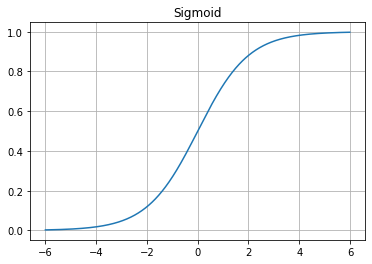

In [2]:
x = np.arange(-6, 6, step=0.01)
y = lambda x: 1/(1+np.exp(-x))
plt.plot(x, y(x));
plt.title("Sigmoid")
plt.grid(); 

Modulating all inputs into an output between 0 and 1

for multiple variables / weights: 
$$y=\frac{1}{1+e^{-(<x|w>)}}$$

**Implement the neuron**

In [3]:
import math

inputs = [.5, .3, .2]
weights = [.4, .7, .2]

#activate = lambda inputs, weights: 1/(1+np.exp(-np.dot(inputs, weights)))

def sigmoid(x): 
    
    y = 1.0 / (1 + math.exp(-x))
    return y

def activate(inputs, weights): 
    
    # Perform net input.
    h = 0
    for x, w in zip(inputs, weights): 
        h += x*w
    
    # perform activation
    return sigmoid(h)
    
output = activate(inputs, weights)

print(output)

0.610639233949222


# 4 - Vector and Matrix Operations

*(already comfortable with this, taking minimal notes)*

**Vector**
- Array of numbers

**Scalar operations**
- vector and a number
- Addition, subtraction, multiplication, division

**Vector addition / subtraction**
- Must have the same dimension
- Element-wise operation

**Dot product**

**Matrices**
- Dimension = (#rows, #columns)
- Transposition = switch rows and columns

**Scalar operations on matrices**

**Matrix addition / subtraction**
- element-wise - must have the same dimensions

**Matrix Multiplication**
- \# cols on 1st matrix = \# rows on 2nd matrix
- (m, n) matrix x (n, k) matrix = (m, k) matrix

# 5 - Computation in Neural Networks

**The artifical neuron**
- Single neuron works well for linear problems
- Real-world problems are complex
- ANNs can reproduce highly nonlinear functions

**Components of an ANN**
- Neurons
- Input, hidden, output layers
- Weighted connections
- Activation functions

**Multilayer Perceptron (MLP)**

1 hidden layer -> 1 or more hidden layers -> output layer

Computation:<br> 
- weights
- net inputs (sum of weighted inputs)
- activations (output of neurons to next layer)<br>
<br>
- use a matrix to hold weights
$$\vec{h}^{(2)} = \vec{x}W^{(1)}$$

**Activation**
$$\vec{a}^{(2)} = f(\vec{h}^{(2)})$$

# 6 - Implementing a neural network from scratch

Project idea: generate a visualization of an ANN

In [4]:
import numpy as np

class MLP: 
    
    # Constructor
    def __init__(self, num_inputs=3, num_hidden=[3, 5], num_outputs=2):
        
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        # Each item in this list is the number of neurons in that layer
        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
        
        # Initiate random weights
        self.weights = []
        for i in range(len(layers)-1): 
            
            # Create a matrix of random numbers representing the weights between 2 layers
            w = np.random.rand(layers[i], layers[i+1])
            self.weights.append(w)
            
    def forward_propagate(self, inputs): 
        activations = inputs
        
        for w in self.weights: 
            # calculate net inputs
            net_inputs = np.dot(activations, w)
            
            # calculate the activations
            activations = self._sigmoid(net_inputs)
        return activations
    
    def _sigmoid(self, x): 
        y = 1.0 / (1 + np.exp(-x))
        return y

In [5]:
# Create MLP 
mlp = MLP()

# Create some inputs
inputs = np.random.rand(mlp.num_inputs)

# perform forward pro
outputs = mlp.forward_propagate(inputs)

# print the results
print("inputs: ", inputs)
print("outputs: ", outputs)

inputs:  [0.86676336 0.29505708 0.44261619]
outputs:  [0.88148404 0.87834559]


Well this is all well and good- but how do we actually train this thing?

# 7 - Training a neural network: Backward propagation and gradient descent

- Foreward: input signals
- Backward: error signals
- calculate using error or loss function (using quadratic in this example) $E = E(p, y) = \frac{1}{2}(p-y)^2$
- Calculate gradient of error functions: $\frac{\partial E}{\partial W^{(n)}}$

**Calculate gradient of error function**<br>
$F = F(x, W)$<br>
$E = E(p, y) = E(F(x, W), y)$
<br><br>
Use the chain rule: 
$$\frac{\partial E}{\partial W^{(2)}} = 
\frac{\partial E}{\partial a^{(3)}}
\frac{\partial a^{(3)}}{\partial h^{(3)}}
\frac{\partial h^{(3)}}{\partial W^{(2)}}$$
<br> 
- See the rest of the derivation in the video- I don't feel like putting all that in mathjax

**Update the parameters**
- Use *Gradient Descent*
- Take a step in opposite direction to gradient
- Step size = learning rate
- 

# 8 - Training a neural network: implementing backpropagation and gradient descent from scratch

In [47]:
import numpy as np

# Train our network with some dummy dataset
# Make some predictions

class MLP(object): 
    """A Multilayer Perceptron class.
    """
    
    # Constructor
    def __init__(self, num_inputs=3, num_hidden=[3, 5], num_outputs=2):
        """Constructor for the MLP. Takes the number of inputs, 
            a variable of hidden layers, nd number of outputs.
            
        Args: 
            num_inputs (int): Number of inputs
            hidden_layers (list): A list of ints for the hidden layers
            num_outputs (int): Number of outputs
        """
        
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        # Create a generic representation of the layers
        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
        
        # Create random connection weights for the layers
        self.weights = []
        for i in range(len(layers)-1): 
            
            # Create a matrix of random numbers representing the weights between 2 layers
            w = np.random.rand(layers[i], layers[i+1])
            
            self.weights.append(w)
            
        # Save activations per layer. 
        activations = []
        for i in range(len(layers)): 
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
            
        
        # Save derivatives per layer
        derivatives = []
        for i in range(len(layers)-1): 
            d = np.zeros((layers[i], layers[i+1]))
            derivatives.append(d)
        self.derivatives = derivatives
        
    def forward_propagate(self, inputs): 
        """Computes forward propagation of the network based on input signalsl.
        
        Args: 
            inputs (ndarray): Input signals
        Returns: 
            activations (ndarray): Output values
        """
        
        # The input layer activation is just the input itself
        activations = inputs
        
        # save the activations for back propogation
        self.activations[0] = inputs
        
        # Iterate through the network layers
        for i, w in enumerate(self.weights): 
            
            # calculate matrix multiplication between the previous activation and weight matrix
            net_inputs = np.dot(activations, w)
            
            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)
            
            # save the activations for back propogation
            self.activations[i+1] = activations
            
        # return output layer activation
        return activations
    
    def back_propagate(self, error, verbose=False): 
        
        # dE/dW_i = (y - a_[i+1]) s'(h_[i+1]) a_i
        # s'(h_[i+1]) = s(h_[i+1])(1 - s(h_[i+1]))
        # s(h_[i+1]) = a_[i+1]
        
        # dE/dW_[i-1] = (y - a_[i+1]) s'(h_[i+1]) W_i s'(h_i) a_[i-1]
        # dE/dW_[i-1] = dE/dW_i 
        
        for i in reversed(range(len(self.derivatives))):
            
            # get activation for previous layer
            activations = self.activations[i+1]
            
            # apply sigmoid derivative function
            delta = error * self._sigmoid_derivative(activations)
            
            # reshape delta so its a 2D array
            delta_re = delta.reshape(delta.shape[0], -1).T
            
            # get activations for the current layer
            current_activations = self.activations[i]
            
            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0], -1)
            
            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)
            
            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)
            
            if verbose: 
                print("Derivatives for W{}: {}".format(i, self.derivatives[i]))
        return error
    
    def gradient_descent(self, learning_rate):
        
        for i in range(len(self.weights)): 
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learning_rate
    
    def train(self, inputs, targets, epochs, learning_rate):
        
        for i in range(epochs): 
            sum_error = 0
            
            for input, target in zip(inputs, targets): 
                
                # forward propagation
                output = self.forward_propagate(input)
                
                # calculate error
                error = target - output
                
                # back propagation
                self.back_propagate(error)
                
                # apply gradient descent
                self.gradient_descent(learning_rate)
                
                sum_error += self._mse(target, output)
            
            # report the error
            print("Error: {} at epoch {}".format(sum_error / len(inputs), i))
            
    def _mse(self, target, output): 
        return np.average((target - output)**2)
    
    def _sigmoid_derivative(self, x):
        return x * (1.0 - x)
        
        
    def _sigmoid(self, x): 
        """Sigmoid activation function
        Args: 
            x (float): value to be processed
        Returns:
            y (float): Output
        """
        
        y = 1.0 / (1 + np.exp(-x))
        return y

In [60]:
# create an mlp
mlp = MLP(2, [5], 1)

# create dummy data
input = np.array([0.1, 0.2])
target = np.array([0.3])

# create a dummy dataset
from random import random
items = np.array([[random() / 2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in items])
# train our mlp
mlp.train(items, targets, 50, 0.1)

Error: 0.046655502959289115 at epoch 0
Error: 0.04035422504819371 at epoch 1
Error: 0.0401436512792856 at epoch 2
Error: 0.03990224224293161 at epoch 3
Error: 0.03960965418836857 at epoch 4
Error: 0.03924246483808063 at epoch 5
Error: 0.03877291259310634 at epoch 6
Error: 0.03816794985156178 at epoch 7
Error: 0.037388863551503476 at epoch 8
Error: 0.03639200257046624 at epoch 9
Error: 0.03513143317926392 at epoch 10
Error: 0.03356453418558694 at epoch 11
Error: 0.03166130291364649 at epoch 12
Error: 0.02941692276433074 at epoch 13
Error: 0.026864583835267557 at epoch 14
Error: 0.024082506164270014 at epoch 15
Error: 0.02118843736915807 at epoch 16
Error: 0.018319596815285395 at epoch 17
Error: 0.015604673501200528 at epoch 18
Error: 0.013139985263915703 at epoch 19
Error: 0.010978838328276837 at epoch 20
Error: 0.009134635105876237 at epoch 21
Error: 0.007591949173218612 at epoch 22
Error: 0.006319011998750968 at epoch 23
Error: 0.005277703449210794 at epoch 24
Error: 0.004429978401458

In [63]:
# make some predictions
inputs = np.array([0.3, 0.1])
target = np.array([0.4])
output = mlp.forward_propagate(inputs)
print()
print()
print("Our network believes that {} + {} is equal to {}".format(inputs[0], inputs[1], output[0]))



Our network believes that 0.3 + 0.1 is equal to 0.3995893594204366


# 9 - How to implement a (simple) network with TensorFlow 2

In [64]:
import numpy as np
from random import random
from sklearn.model_selection import train_test_split

def generate_dataset(num_samples, test_size):
    x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
    y = np.array([[i[0] + i[1]] for i in x])

    # split into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = generate_dataset(10, 0.2)
print("x_test = \n{}".format(x_test))
print("y_test = \n{}".format(y_test))
# build model


# compile model
# train model
# evaluate model
# make predictions

KeyboardInterrupt: 